# PRACTICA GUIADA: Nociones de Estadística Inferencial

## Introducción

La idea de esta práctica es 
Observemos la distribución de los [Klout Scores](https://klout.com/corp/score) que se adjunta en el archivo `klouts_scores.csv`.

Imagine que tomamos como población las 1048 observaciones de Klout scores con las que contamos. 


## 1. Aproximando una distribución muestral de medias

### Consignas

1. Obtenemos una muestra de tamaño 5 y tomamos el promedio. Repetimos este paso 1000 veces para poder hacer un histograma de las medias. 
2. Obtenemos una muestra de tamaño  10 y tomamos el promedio. Repetimos este paso 1000 veces.
3. Obtenemos una muestra de tamaño 100 y tomamos el promedio. Repetimos este paso 1000 veces.
4. ¿Qué observa sobre el histograma de la media a medida que vamos aumentando el tamaño muestral?
5. ¿Qué observa acerca del valor de las medias de las diferentes distribuciones muestrales en relación a la media poblacional?
6. ¿Qué sucede con el desvío estándar? 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/klout_scores.csv', header=None, decimal=",")
df.columns = ['k_score']

Definimos una función para hacer el sampling y calcular la media para una muestra de tamamaño n.

In [3]:
def sampling(df, n, r = False):
    index = np.random.choice(range(0,len(df)), size = n, replace = r)
    samp_array = np.array(df.iloc[index,])
    return(samp_array)


def samp_mean(df, n_i):
    means = []
    for reps in range(0,1000):
        s_ = sampling(df, n_i, r = True)
        m_ = s_.mean()
        means.append(m_)
    return(means)


In [4]:
# Exploramos el DataFrame:

df.head()

,k_score
0,25.104179
1,60.908747
2,23.222238
3,51.553491
4,22.629690


In [5]:
# Obtenemos las principales medidas descriptivas:

df.describe()

,k_score
count,1048.000000
mean,37.719055
std,16.044315
min,10.000000
25%,23.174620
50%,41.094683
75%,50.284432
max,87.247529


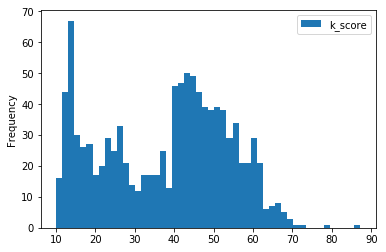

In [6]:
# Visualizamos la distribución de los scores Klout. Vemos que su distribución es bimodal 
df.plot.hist(bins=50);

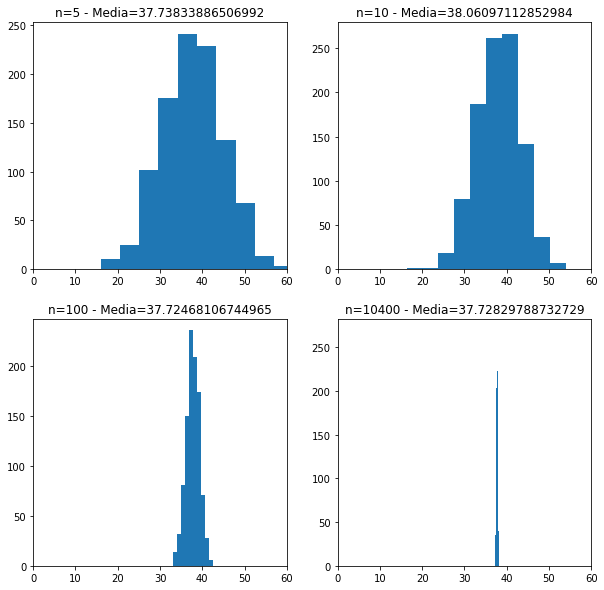

In [7]:
m = []
n_s = [5,10,100,10400]
plt.figure(figsize=(10,10))
for i in range(len(n_s)):
    
    mm = samp_mean(df, n_s[i])    
    
    plt.subplot(('22' + str(i+1)))
    
    plt.hist(mm)
    
    plt.xlim((0,60))
    
    plt.title('n=' + str(n_s[i]) + ' - ' + 'Media=' + str(np.mean(mm)))
    

## 2. Calculando un intervalo de confianza con `scipy`

### Consignas

1. Ahora, extraiga una muestra de la población de tamaño n=200. 
2. A continuación, calcule un intervalo de confianza del 95% para la media poblacional

In [8]:
#Extraemos la muestra 
sample = sampling(df,200)

In [9]:
sample

array([[19.71264037],
       [24.67416492],
       [17.91381043],
       [40.37544427],
       [29.31439039],
       [66.59710971],
       [59.99034026],
       [53.44145707],
       [49.70149333],
       [13.9632455 ],
       [63.96324954],
       [16.72102885],
       [15.76151589],
       [25.01137488],
       [56.22534076],
       [47.68969982],
       [44.69614508],
       [63.97113292],
       [12.01085146],
       [28.86099649],
       [56.70408567],
       [51.64524827],
       [43.18299568],
       [16.40995647],
       [40.87938196],
       [53.30779866],
       [13.23209985],
       [26.85291427],
       [41.36937863],
       [13.26495186],
       [18.24407031],
       [18.06758466],
       [11.58053927],
       [48.28467538],
       [13.19412275],
       [67.83517438],
       [58.26605087],
       [11.74494404],
       [19.17850599],
       [50.48984678],
       [50.64197496],
       [59.41168479],
       [14.70959318],
       [33.30457065],
       [72.34148601],
       [23

In [10]:
# Calculamos los estadísticos para utilizar
mean, sigma, n = np.mean(sample), np.std(sample), len(sample)

# Calculamos el intervalo de confianza de una aproximación normal con el método de scipy
st.norm.interval(0.95, loc=mean, scale = sigma/np.sqrt(n) )

(34.140004304390025, 38.68719149048898)

In [11]:
# Podemos calcularlo a mano... en base a la fórmula vista en las slides

mean - 1.96 * sigma/np.sqrt(n), mean + 1.96*sigma/np.sqrt(n)

(34.139962525806524, 38.68723326907248)

In [12]:
# Podemos usar la T-Student:

st.t.interval(0.95, n-1,  loc=mean, scale=sigma/(np.sqrt(n)))

(34.12609271870044, 38.70110307617856)

In [13]:
# Podemos calcularlo a mano:

EI = mean + st.t.ppf(0.025, n-1)* sigma/(np.sqrt(n))
ES = mean + st.t.ppf(0.975, n-1)* sigma/(np.sqrt(n))

IC = (EI, ES)
IC

(34.12609271870044, 38.70110307617856)

In [14]:
# ppf(q, df, loc=0, scale=1)	Percent point function. Inversa de la cdf 
#(cumulative density function) 

st.t.cdf(st.t.ppf(0.025, n-1), n-1)

0.025000000000135667

In [15]:
st.t.cdf(st.t.ppf(0.975, n-1), n-1)

0.9749999999998643